## Feature Selection

In this notebook, we are going to do feature selection method on breast-cancer-data.csv dataset.

Feature selection is a method that helps in the inclusion of the significant variables that help form a model with good predictive power.

we will cover the following concepts with the help of a business use case:
- Feature Selection
- Dimensionality Reduction
- Dimensionality Reduction Techniques

Prominent Methods Used for Feature Selection:
- Factor Analysis
- Principal Component Analysis
- LDA


### Benefits of Feature Selection
- It reduces overfitting as the unwanted variables are removed, and the focus is on the significant variables.
- It removes irrelevant information, which helps to improve the accuracy of the model’s predictions.
- It reduces the computation time involved to get the model's predictions.

**Problem Statement :**

John Cancer Hospital (JCH) is a leading cancer hospital in the USA. It specializes in preventing breast cancer.
Over the last few years, JCH has collected breast cancer data from patients who came for screening or treatment.
However, this data has 32 attributes and is difficult to run and interpret the result. As an ML expert,
you have to reduce the number of attributes so that the results are meaningful and accurate.
Use FA for feature selection.


In [1]:
# import the required library

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
# Load the dataset and store in df
df = pd.read_csv('breast-cancer-data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# shape of the dataset
df.shape

(569, 32)

In [4]:
# Check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# defining the array as np.array
feature_names = np.array(['mean radius' 'mean texture' 'mean perimeter' 'mean area'
'mean smoothness' 'mean compactness' 'mean concavity'
'mean concave points' 'mean symmetry' 'mean fractal dimension'
'radius error' 'texture error' 'perimeter error' 'area error'
'smoothness error' 'compactness error' 'concavity error'
'concave points error' 'symmetry error' 'fractal dimension error'
'worst radius' 'worst texture' 'worst perimeter' 'worst area'
'worst smoothness' 'worst compactness' 'worst concavity'
'worst concave points' 'worst symmetry' 'worst fractal dimension'])

In [6]:
# import label encoder
from sklearn.preprocessing import LabelEncoder


In [7]:
#Converting diagnosis to numerical variable in df
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)


In [8]:
# import FactorAnalyzer and calculate_bartlett_sphericity.

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(40196.161163009565, 0.0)

In [9]:
# Kaiser-Meyer-Olkin Test

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

C:\Users\Shubham\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [10]:
kmo_model

0.2606290621756054

In the above code, we are calculating the KMO. KMO estimates the proportion of variance among all the observed variables.

The overall KMO for the data is 0.25, which is excellent. This value indicates that you can proceed with your planned factor analysis

In [11]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [12]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [13]:
# Creating Dataset of Significant Variables

df_corr = df[['radius_mean','perimeter_mean', 'area_mean','radius_worst','perimeter_worst','area_worst',
              'concavity_mean','concave points_mean', 'concavity_worst','concave points_worst','diagnosis']]

In [14]:
# KMO Test
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df_corr)
kmo_model

0.8260787423549238

The value of the KMO model is greater than 0.5. Therefore, the dataset is good enough for factor analysis.

In [15]:
# Factor Analysis

from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation='varimax')
fa.fit(df_corr,11)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [16]:
ev, v = fa.get_eigenvalues()
ev

array([9.09178108e+00, 1.15744917e+00, 3.30050451e-01, 1.75328755e-01,
       1.20114615e-01, 8.46813558e-02, 2.04348144e-02, 1.33778025e-02,
       4.91643818e-03, 1.55811996e-03, 3.07397281e-04])

in the above code, you can see only for 6-factors eigenvalues are greater than one. It means we only need to choose 6 factors (or unobserved
variables).

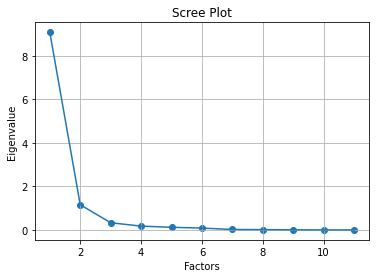

In [17]:
# plot the graph for eigen values

plt.scatter(range(1,df_corr.shape[1]+1),ev)
plt.plot(range(1,df_corr.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [18]:
fa1 = FactorAnalyzer(rotation="varimax", n_factors=2)
fa1.fit(df, 2)


FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [19]:
fa1.loadings_

array([[ 0.09949821, -0.0175289 ],
       [ 0.76990049,  0.2623415 ],
       [ 0.97577564, -0.05180551],
       [ 0.37374525,  0.08592885],
       [ 0.97834605,  0.0038596 ],
       [ 0.97757835, -0.04299328],
       [ 0.21011043,  0.61739299],
       [ 0.54025265,  0.78340654],
       [ 0.71664403,  0.63252346],
       [ 0.84801319,  0.44148548],
       [ 0.19103234,  0.61468442],
       [-0.26532102,  0.86590235],
       [ 0.7431245 ,  0.18542383],
       [-0.04891221,  0.18458444],
       [ 0.7388625 ,  0.2275271 ],
       [ 0.79163254,  0.08879413],
       [-0.18452397,  0.38701833],
       [ 0.22456327,  0.78529352],
       [ 0.2181755 ,  0.66739593],
       [ 0.3904135 ,  0.59545101],
       [-0.08217263,  0.40098444],
       [-0.03298699,  0.73180422],
       [ 0.98993514, -0.00563542],
       [ 0.36256059,  0.11401422],
       [ 0.99041424,  0.05315551],
       [ 0.97481138, -0.01017728],
       [ 0.18911152,  0.5607166 ],
       [ 0.46178052,  0.6952383 ],
       [ 0.5755513 ,

In [20]:
# CFA stands for Confirmatory Factor Analysis.This line imports CFA function

from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser) 

In [21]:
model_dict = {"F1": ['radius_mean','perimeter_mean', 'area_mean','radius_worst',
 'perimeter_worst','diagnosis'], "F2": ['area_worst','concavity_mean',
 'concave points_mean', 'concavity_worst','concave points_worst']}

In [22]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df_corr,model_dict)


In [23]:
# Performs confirmatory factor analysis

cfa1 = ConfirmatoryFactorAnalyzer(model_spec, disp=False)
cfa1.fit(df_corr.values)


ConfirmatoryFactorAnalyzer(disp=False, n_obs=569,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x0000029495DBA760>)

In [24]:
# cfa1.loadings_ will gave you the factor loading matrix
cfa1.loadings_

array([[ -250.83529395,     0.        ],
       [ 2650.13027068,     0.        ],
       [38118.95270005,     0.        ],
       [  244.74668285,     0.        ],
       [ 3844.80208755,     0.        ],
       [64168.44127782,     0.        ],
       [    0.        , -1302.43678918],
       [    0.        , -2194.92492361],
       [    0.        ,  -188.31869992],
       [    0.        ,  8749.31881222],
       [    0.        , -1052.97798224]])

In [25]:
#This will give you the factor covariance matrix and the type of this will be numpy array
cfa1.factor_varcovs_

array([[1.        , 0.22376321],
       [0.22376321, 1.        ]])

In [26]:
cfa1.transform(df_corr.values)

array([[ 1.64950323e-02,  2.11807720e-04],
       [ 1.68537785e-02,  4.91910296e-05],
       [ 1.31164360e-02,  1.28116866e-04],
       ...,
       [ 4.02829539e-03,  6.75958467e-05],
       [ 1.48920047e-02,  2.77167201e-04],
       [-9.99100428e-03, -1.29045452e-04]])

### Principal Component

A principal component is a normalized linear combination of the original predictors in a dataset.

Equation for first principal component:
**Z¹ = Φ¹¹X¹ + Φ²¹X² + Φ³¹X³ + .... +Φp¹Xp**

Equation for first principal component:
**Z² = Φ¹²X¹ + Φ²²X² + Φ³²X³ + .... + Φp2Xp**

### Feature Selection in Cancer Dataset Using PCA

In [28]:
target_data=df["diagnosis"]
encoder = LabelEncoder()
target_data = encoder.fit_transform(target_data)

In [29]:
# Drop the D=diagnosis column from df

df.drop(["diagnosis"],axis = 1, inplace = True)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [32]:
# Standardize the data
scaled_data = scaler.transform(df)

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # pass the number of component

In [35]:

pca.fit(scaled_data)

PCA(n_components=2)

In [36]:
x_pca = pca.transform(scaled_data)

In [37]:
#shape of scaled_data 
scaled_data.shape

(569, 31)

In [38]:
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

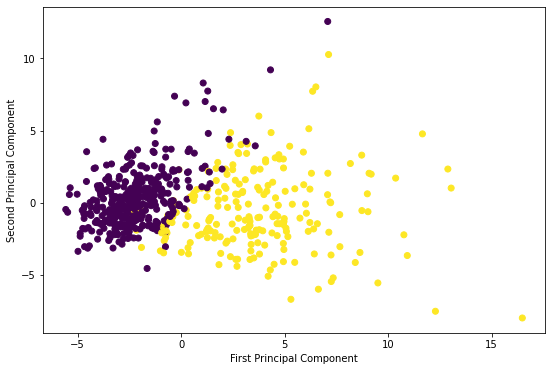

In [39]:
# Reduced 30 dimensions to just 2

plt.figure(figsize=(9,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target_data,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [40]:
pca.components_

array([[ 0.02291216,  0.21891302,  0.10384388,  0.22753491,  0.22104577,
         0.14241471,  0.2390673 ,  0.25828025,  0.26073811,  0.13797774,
         0.06414779,  0.20611747,  0.01741339,  0.21144652,  0.20307642,
         0.01467821,  0.1702884 ,  0.15354367,  0.18340675,  0.04241552,
         0.10249607,  0.22800935,  0.10451545,  0.23663734,  0.22493214,
         0.12782441,  0.20988456,  0.22860218,  0.2507462 ,  0.12267993,
         0.13156024],
       [-0.03406849, -0.2332714 , -0.0600442 , -0.214589  , -0.23066882,
         0.18642221,  0.15245473,  0.06054163, -0.03416739,  0.19068498,
         0.36653106, -0.1059357 ,  0.08954779, -0.08980704, -0.15277129,
         0.20318988,  0.23250336,  0.19684608,  0.12996518,  0.18355863,
         0.27958414, -0.21929604, -0.04550122, -0.19929599, -0.21898546,
         0.17256296,  0.14425364,  0.09852652, -0.00753437,  0.14261944,
         0.27570208]])

In [41]:
pca.explained_variance_ratio_

array([0.42864701, 0.18376792])

In [42]:
pca_3 = PCA(n_components=3)
pca_3.fit(scaled_data)
x_pca_3 = pca_3.transform(scaled_data)

In [44]:
x_pca_3.shape

(569, 3)

In [46]:
pca_3.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436])

### Feature Selection in Cancer Dataset Using LDA

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [54]:
# load data

df = pd.read_csv('breast-cancer-data.csv')

In [55]:
df.shape

(569, 32)

In [56]:
# map categorical variable 'diagnosis' into numeric

df.diagnosis = df.diagnosis.map({'M': 1, 'B': 0})

In [57]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [48]:
# Drop redundant column 'id'

df.drop('id', axis=1, inplace=True)

In [49]:
# Check for Null values
df.isna().any()

radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
dtype: boo

In [58]:
# Split the dataset

X_train, X_val, y_train, y_val = train_test_split(df.iloc[:,:-1], df['diagnosis'],
                                                  train_size=0.8, test_size=0.2, random_state=120)

In [60]:
# Normalize the feature
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_val_norm = norm.transform(X_val)

In [62]:
#  find the LDA Accuracy and LDA Classification Report.

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_norm, y_train)
lda_predicted = lda.predict(X_val_norm)

print('LDA Accuracy is: {}'.format(accuracy_score(y_val,lda_predicted)))
print('LDA Classification Report')
print(classification_report(y_val, lda_predicted))

LDA Accuracy is: 0.7807017543859649
LDA Classification Report
              precision    recall  f1-score   support

           0       0.74      0.99      0.85        71
           1       0.95      0.44      0.60        43

    accuracy                           0.78       114
   macro avg       0.85      0.71      0.73       114
weighted avg       0.82      0.78      0.76       114



In [64]:
# Print the confusionn matrix of LDA
confusion_matrix_lda = pd.DataFrame(confusion_matrix(y_val, lda_predicted),
                                    index = ['Actual Negative','Actual Positive'],
                                    columns = ['Predicted Negative','Predicted Postive'] )

confusion_matrix_lda

,Predicted Negative,Predicted Postive
Actual Negative,70,1
Actual Positive,24,19
